Titanic Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
titanic_df= pd.read_csv('../input/titanic_data.csv')

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ibrahim Shawah, Mr. Yousseff",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


In [10]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


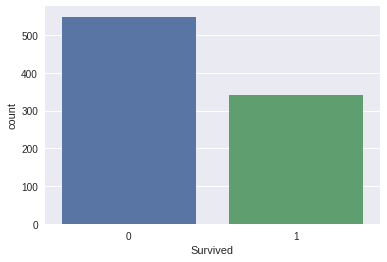

In [11]:
sns.countplot(x='Survived',data=titanic_df)

In [12]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

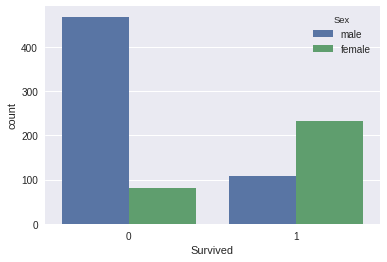

In [14]:
sns.countplot(x='Survived',data=titanic_df,hue='Sex')

In [15]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

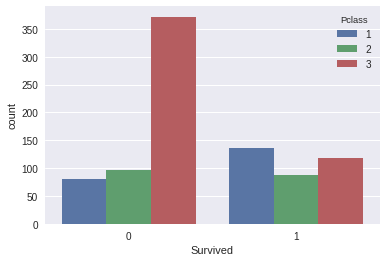

In [17]:
sns.countplot(x='Survived', data=titanic_df, hue='Pclass')

In [18]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


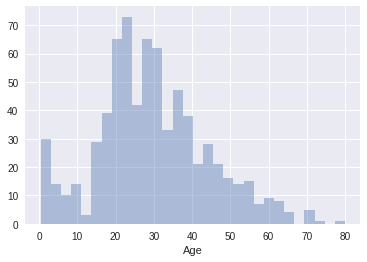

In [19]:
sns.distplot(titanic_df['Age'].dropna(), kde=False, bins=30)

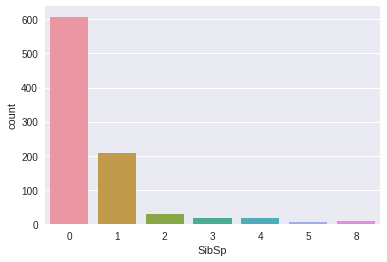

In [20]:
sns.countplot(x='SibSp',data=titanic_df)

In [21]:
titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


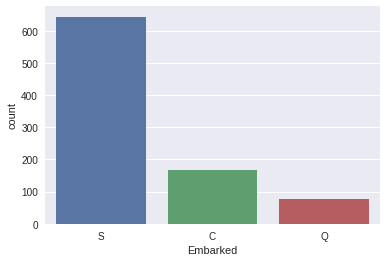

In [22]:
sns.countplot(x='Embarked',data=titanic_df)

In [23]:
titanic_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


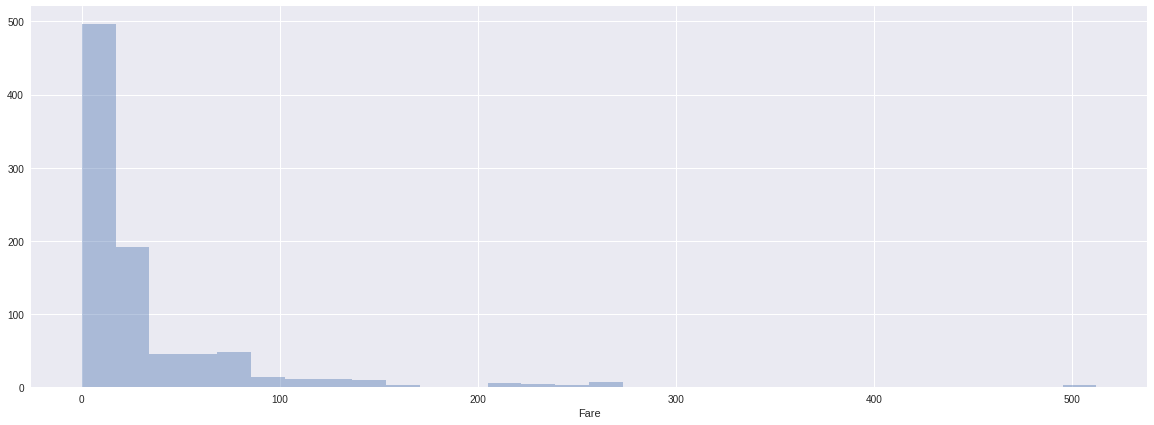

In [24]:
plt.figure(figsize=(20,7))
sns.distplot(titanic_df['Fare'],kde=False, bins=30)

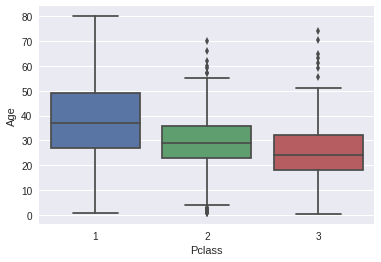

In [25]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df)

In [26]:
titanic_df[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [27]:
#CLEANING THE DATA

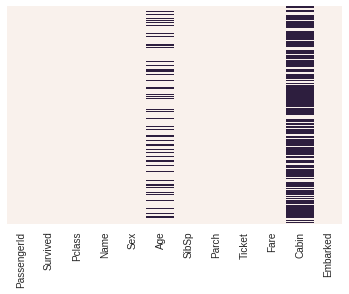

In [28]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False)

In [29]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 25
    else:
        return Age

In [30]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(input_age,axis=1)

In [31]:
titanic_df[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Age
0,1,38.201019
1,2,29.884946
2,3,25.101670


In [32]:
titanic_df['Embarked'].fillna('S',inplace=True)

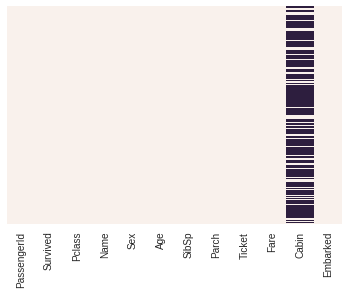

In [33]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False)

In [34]:
#Create Dummies

In [35]:
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [36]:
titanic_df = pd.concat([titanic_df,sex,embark],axis=1)

In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [38]:
#titanic_df.drop(['PassengerId','Sex','Embarked','Fare','Age','Name','Cabin','Ticket'],axis=1,inplace=True)

In [39]:
titanic_df.drop(['Sex','Embarked','Fare','Age','Name','Cabin','Ticket'],axis=1,inplace=True)

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,male,Q,S
0,1,0,3,1,0,1,0,1
1,2,1,1,1,0,0,0,0
2,3,1,3,0,0,0,0,1
3,4,1,1,1,0,0,0,1
4,5,0,3,0,0,1,0,1


In [41]:
type(titanic_df)

pandas.core.frame.DataFrame

In [42]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), 
                                                    titanic_df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [43]:
X_train.shape, y_train.shape, X_test.shape

((623, 7), (623,), (268, 7))

In [44]:
logmodel = LogisticRegression()

In [45]:
logmodel.fit(X_train.drop('PassengerId',axis=1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
Predictions_log = logmodel.predict(X_test.drop('PassengerId',axis=1))

In [47]:
Predictions_log

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [48]:
logmodel.coef_

array([[-0.76038964, -0.1577966 , -0.00978187, -2.49342773, -0.05574978,
        -0.39282591]])

In [49]:
print(classification_report(y_test,Predictions_log))

             precision    recall  f1-score   support

          0       0.76      0.88      0.82       154
          1       0.80      0.63      0.71       114

avg / total       0.78      0.78      0.77       268



In [50]:
print(confusion_matrix(y_test,Predictions_log))

[[136  18]
 [ 42  72]]


In [51]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logmodel.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Survived,-0.760390
1,Pclass,-0.157797
2,SibSp,-0.009782
3,Parch,-2.493428
4,male,-0.055750
5,Q,-0.392826
6,S,NaN


In [52]:
logmodel.intercept_

array([ 3.00685583])

In [53]:
#Logistic Score
logmodel.score(X_train.drop('PassengerId',axis=1), y_train)

0.81380417335473521

In [54]:
submission_log = pd.DataFrame({
        "PassengerId": X_test['PassengerId'],
        "Survived": Predictions_log
    })

In [55]:
submission_log.head()

,PassengerId,Survived
331,332,0
700,701,1
748,749,0
751,752,0
481,482,0


In [56]:
submission_log.to_csv('titanic_log.csv',index=False)

In [57]:
#RANDOM FOREST

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)

In [59]:
random_forest.fit(X_train.drop('PassengerId',axis=1), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
Predictions_random_forest = random_forest.predict(X_test.drop('PassengerId',axis=1))

In [61]:
Predictions_random_forest

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [62]:
Predictions_random_forest.shape

(268,)

In [63]:
print(classification_report(y_test,Predictions_random_forest))

             precision    recall  f1-score   support

          0       0.74      0.91      0.82       154
          1       0.82      0.57      0.67       114

avg / total       0.78      0.76      0.76       268



In [64]:
print(confusion_matrix(y_test,Predictions_random_forest))

[[140  14]
 [ 49  65]]


In [65]:
random_forest.score(X_train.drop('PassengerId',axis=1), y_train)

0.85874799357945431

In [66]:
submission_random_forest = pd.DataFrame({
        "PassengerId": X_test['PassengerId'],
        "Survived": Predictions_random_forest
    })

In [67]:
submission_random_forest.to_csv('titanic_rf.csv',index=False)